<a href="https://colab.research.google.com/github/Nunticha24/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'นันทิชา วิชิต'
ID = '623020526-8'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:13


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-1.122979,-3.295591,-1.905968,8.807450,3.436086,-7.863223,7.261924,-2.483273,5.677271,-1.384419,-5.713879,-0.701148,-4.897625,-6.022824,-4.822365,2.341001,-1.972514,9.505130,2.176511,-7.749094,7.020367,-4.584958,-8.326107,-4.272719,4.336434,-5.695388,-2.706593,8.540504,10.424226,2.216951,-6.591182,13.084756
1,-1.178806,-1.705041,-2.304133,8.370834,5.129572,-7.872284,4.108793,-2.045335,6.425141,-2.940128,-7.962174,0.004099,-6.024449,-7.155523,-3.888844,1.612577,-0.771112,8.855043,2.296529,-8.149986,5.307715,-5.962821,-7.641550,-3.307962,3.394114,-4.219148,-2.052904,10.047594,10.208270,4.121820,-3.410083,22.609099
2,0.904578,4.691859,-3.682533,-2.953914,5.427658,-7.973544,-6.298981,-5.837808,-6.806116,4.240747,-6.726297,-2.661466,2.331365,-2.299572,-3.537591,2.937966,7.014755,-2.094251,-7.833492,7.046922,6.967556,-3.341271,3.557202,-1.224863,4.301185,-6.613338,-8.054432,8.960152,8.176317,-4.350617,9.383718,-19.753085
3,-8.309558,-0.700731,-6.674782,6.733736,8.064153,-9.515225,9.423268,10.051663,5.773942,2.191188,-6.168410,-3.242995,7.661962,-3.454031,-6.803181,-4.604935,0.994939,-9.752362,6.206699,-7.746425,-2.671065,-8.756579,3.640509,-3.570759,5.755518,3.337119,-2.788030,-9.860391,8.703038,3.645643,-1.401462,20.228213
4,8.340888,-8.214758,-5.512123,-1.567990,5.905051,8.980198,8.079326,3.190559,-0.398816,-1.669538,5.329574,3.758042,2.629444,-2.314456,6.568466,6.071499,-5.243972,3.210821,6.460610,-11.300239,-9.199506,9.716673,6.044433,4.530647,6.792402,-5.300715,-8.420804,5.595060,0.070567,6.126067,-16.429515,32.630334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.621194,3.082826,-6.051600,-9.254466,5.131143,0.667478,-1.629920,-1.360385,-1.946909,-4.092077,2.009247,1.749112,-3.929099,-1.599213,-3.747115,1.836762,-7.503489,3.989790,5.298064,-6.293570,5.447109,-3.485855,3.683923,5.746130,5.880837,2.346970,2.474427,0.988740,-2.332277,0.787062,6.165651,5.935309
9996,-0.565152,4.502084,-4.958137,-1.130835,6.393298,-10.045349,-5.483434,-6.521711,-3.976157,2.130145,-7.738335,-2.840233,1.204603,-4.691612,-2.654711,1.921697,7.099371,-0.297220,-10.052557,7.396492,6.868344,-2.660437,2.540235,-0.749447,4.566415,-7.151448,-8.291589,8.715938,5.509624,-7.029211,9.004169,-33.146053
9997,5.458936,6.669342,-9.677379,-4.951354,5.975153,0.109411,9.595156,0.086257,6.671417,-0.332043,7.129822,-5.413321,-0.944951,-0.779493,-1.810268,6.062982,-3.143105,-2.785437,-1.798621,-2.375633,2.291665,-6.591749,4.390090,-3.670793,11.363186,-6.152867,4.829156,-1.963335,-7.680129,4.356970,13.338685,23.784849
9998,5.167506,9.960286,5.908806,-5.992349,-6.306272,-2.778985,11.405055,1.561802,7.698767,-9.825561,5.709468,-9.183920,-9.588192,-11.000842,-5.495952,-3.846113,9.210216,7.947077,0.979926,6.075725,-9.279143,4.291894,-9.643116,-6.771529,8.741895,-2.417855,6.372045,1.503416,3.849181,4.402622,19.920572,24.013108


เตรียมข้อมูลก่อนนำไปใช้ โดยตัด correlationที่ซ้ำกันออกไป เพื่อลดข้อมูล

In [6]:
Data.shape 
#ดูขนาดของข้อมูล 

(10000, 32)

In [7]:
corr = np.corrcoef(Data.to_numpy().T)

In [8]:
corr.shape 
#ดูขนาดของ corrcoef

(32, 32)

In [9]:
corr

array([[ 1.        ,  0.11158179,  0.0475386 , ...,  0.13355265,
         0.11158179,  0.13355265],
       [ 0.11158179,  1.        ,  0.28012196, ...,  0.00354079,
         1.        ,  0.00354079],
       [ 0.0475386 ,  0.28012196,  1.        , ..., -0.05306425,
         0.28012196, -0.05306425],
       ...,
       [ 0.13355265,  0.00354079, -0.05306425, ...,  1.        ,
         0.00354079,  1.        ],
       [ 0.11158179,  1.        ,  0.28012196, ...,  0.00354079,
         1.        ,  0.00354079],
       [ 0.13355265,  0.00354079, -0.05306425, ...,  1.        ,
         0.00354079,  1.        ]])

In [10]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')
#วนลูปหาค่า correlation ที่ซ้ำกัน

row = 1 column = 30 corrcoef = 1.0
row = 29 column = 31 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


จากการวนลูปพบว่าค่าที่มีค่าที่เท่ากันหรือซ้ำกัน จึงจำเป็นที่จะต้องตัดข้อมูลออกก่อนนำไปใช้ โดยการแสดงข้อมูลทั้งหมด

In [13]:
newdata = Data.iloc[1:,:31]
newdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1,-1.178806,-1.705041,-2.304133,8.370834,5.129572,-7.872284,4.108793,-2.045335,6.425141,-2.940128,-7.962174,0.004099,-6.024449,-7.155523,-3.888844,1.612577,-0.771112,8.855043,2.296529,-8.149986,5.307715,-5.962821,-7.641550,-3.307962,3.394114,-4.219148,-2.052904,10.047594,10.208270,4.121820,-3.410083
2,0.904578,4.691859,-3.682533,-2.953914,5.427658,-7.973544,-6.298981,-5.837808,-6.806116,4.240747,-6.726297,-2.661466,2.331365,-2.299572,-3.537591,2.937966,7.014755,-2.094251,-7.833492,7.046922,6.967556,-3.341271,3.557202,-1.224863,4.301185,-6.613338,-8.054432,8.960152,8.176317,-4.350617,9.383718
3,-8.309558,-0.700731,-6.674782,6.733736,8.064153,-9.515225,9.423268,10.051663,5.773942,2.191188,-6.168410,-3.242995,7.661962,-3.454031,-6.803181,-4.604935,0.994939,-9.752362,6.206699,-7.746425,-2.671065,-8.756579,3.640509,-3.570759,5.755518,3.337119,-2.788030,-9.860391,8.703038,3.645643,-1.401462
4,8.340888,-8.214758,-5.512123,-1.567990,5.905051,8.980198,8.079326,3.190559,-0.398816,-1.669538,5.329574,3.758042,2.629444,-2.314456,6.568466,6.071499,-5.243972,3.210821,6.460610,-11.300239,-9.199506,9.716673,6.044433,4.530647,6.792402,-5.300715,-8.420804,5.595060,0.070567,6.126067,-16.429515
5,-0.008196,-3.905819,-2.637004,11.584560,3.609969,-4.922349,4.130803,-0.354242,5.428811,-1.945650,-4.310180,-0.241423,-6.209236,-6.010673,-4.444782,0.892926,-0.181288,8.701273,4.289904,-6.810533,6.110376,-5.082506,-8.846683,-2.556855,3.647087,-5.247500,-4.014248,8.827011,10.689298,3.435147,-7.811637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.621194,3.082826,-6.051600,-9.254466,5.131143,0.667478,-1.629920,-1.360385,-1.946909,-4.092077,2.009247,1.749112,-3.929099,-1.599213,-3.747115,1.836762,-7.503489,3.989790,5.298064,-6.293570,5.447109,-3.485855,3.683923,5.746130,5.880837,2.346970,2.474427,0.988740,-2.332277,0.787062,6.165651
9996,-0.565152,4.502084,-4.958137,-1.130835,6.393298,-10.045349,-5.483434,-6.521711,-3.976157,2.130145,-7.738335,-2.840233,1.204603,-4.691612,-2.654711,1.921697,7.099371,-0.297220,-10.052557,7.396492,6.868344,-2.660437,2.540235,-0.749447,4.566415,-7.151448,-8.291589,8.715938,5.509624,-7.029211,9.004169
9997,5.458936,6.669342,-9.677379,-4.951354,5.975153,0.109411,9.595156,0.086257,6.671417,-0.332043,7.129822,-5.413321,-0.944951,-0.779493,-1.810268,6.062982,-3.143105,-2.785437,-1.798621,-2.375633,2.291665,-6.591749,4.390090,-3.670793,11.363186,-6.152867,4.829156,-1.963335,-7.680129,4.356970,13.338685
9998,5.167506,9.960286,5.908806,-5.992349,-6.306272,-2.778985,11.405055,1.561802,7.698767,-9.825561,5.709468,-9.183920,-9.588192,-11.000842,-5.495952,-3.846113,9.210216,7.947077,0.979926,6.075725,-9.279143,4.291894,-9.643116,-6.771529,8.741895,-2.417855,6.372045,1.503416,3.849181,4.402622,19.920572


#**2.ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

**Import**

In [14]:
from sklearn.cluster import KMeans
#import function ที่ต้องการใช้ในการทำ K-mean

**Defind**

In [15]:
kmeans = KMeans(n_clusters=3,random_state=2021)
#กำหนดค่า k  (ถ้ามีค่า defult ไม่ต้องกำหนดค่า k ก็ได้)
#random_state=2021 กำหนดให้เริ่มสุ่มที่จุดเดียวกัน จะได้มีการจัดกลุ่มเหมือนกัน

**Fit-transfrom**

In [16]:
kmeans.fit(Data) 
#คำนวณหาจุด cluter centers ของ newdata

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [17]:
kmeans.cluster_centers_
#แสดงจุดที่คำนวณได้

array([[ 2.36312112e+00, -3.57334831e+00, -2.98576187e-01,
         4.44720149e+00, -1.62739872e+00,  6.09856381e+00,
         4.73017951e+00, -1.94983759e+00, -2.98145262e+00,
        -2.12826486e+00,  2.53710462e+00, -4.61318995e-01,
         1.50048996e+00,  2.82098171e+00,  5.95444794e+00,
         1.82802363e+00, -3.28184200e-01,  3.14333971e+00,
         5.08958206e+00, -4.48039417e-01,  5.18546986e-01,
         2.01307568e+00,  3.90618986e+00,  1.44977948e+00,
         6.12219763e+00,  2.78653425e-01, -1.09583798e+00,
         9.26455179e-01, -9.93665092e-01,  7.11081508e+00,
        -7.14669663e+00,  3.75540754e+01],
       [ 1.26325758e+00,  2.69438228e+00, -2.17233773e+00,
         1.50249405e+00,  1.32928978e+00, -1.65430771e+00,
         2.68054221e+00,  2.11375769e+00,  3.97754902e+00,
        -2.25748407e+00,  7.01694096e-01, -3.97764877e-01,
        -1.34572953e+00, -1.13655333e+00, -3.91278994e+00,
        -4.38672748e-01, -7.96311024e-02,  1.73583594e+00,
         1.49

In [18]:
y = kmeans.predict(Data)
y
#ทดสอบการจัดกลุ่มของ Data

array([1, 1, 2, ..., 1, 1, 0], dtype=int32)

**ทำ PCA ลด Dimention**

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [22]:
new_pca = pca.fit_transform(Data)

**plot กราฟเพื่อดูการกระจายกลุ่ม**

In [23]:
from matplotlib import pyplot as plt

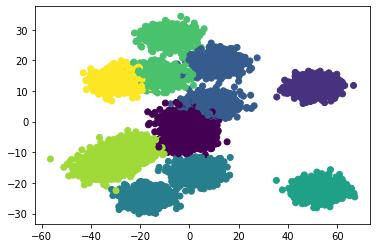

In [25]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

**หาค่า k ที่เหมาะสมของ data ด้วยวิธี " The elbow method "**

In [26]:
kmeans.inertia_
#คำนวนค่า SSE

4223015.069657261

In [27]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [28]:
SSE

[17376235.56078428,
 12379473.796194354,
 10129784.269352978,
 8730523.544304458,
 7615456.759086133,
 6520299.778351892,
 5320747.510562791,
 4223015.069657261]

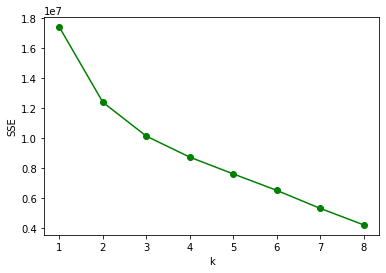

In [29]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-g')
plt.xlabel('k')
plt.ylabel('SSE');
#นำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามี k กี่กลุ่ม

จากกราฟจะบอกได้ว่ามี k ทั้งหมด 3 กลุ่ม

**หาค่า k ด้วยวิธี " The silhouette coefficient"**

In [30]:
from sklearn import metrics
#import function metrics มาใช้

In [31]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

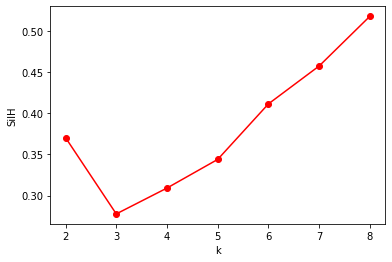

In [32]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-r')
plt.xlabel('k')
plt.ylabel('SilH');

จากกราฟจะบอกได้ว่ามี k ทั้งหมด 3 กลุ่ม

In [34]:
plt.rcParams['figure.figsize']=[15,20]
#กำหนดขนาดกราฟ

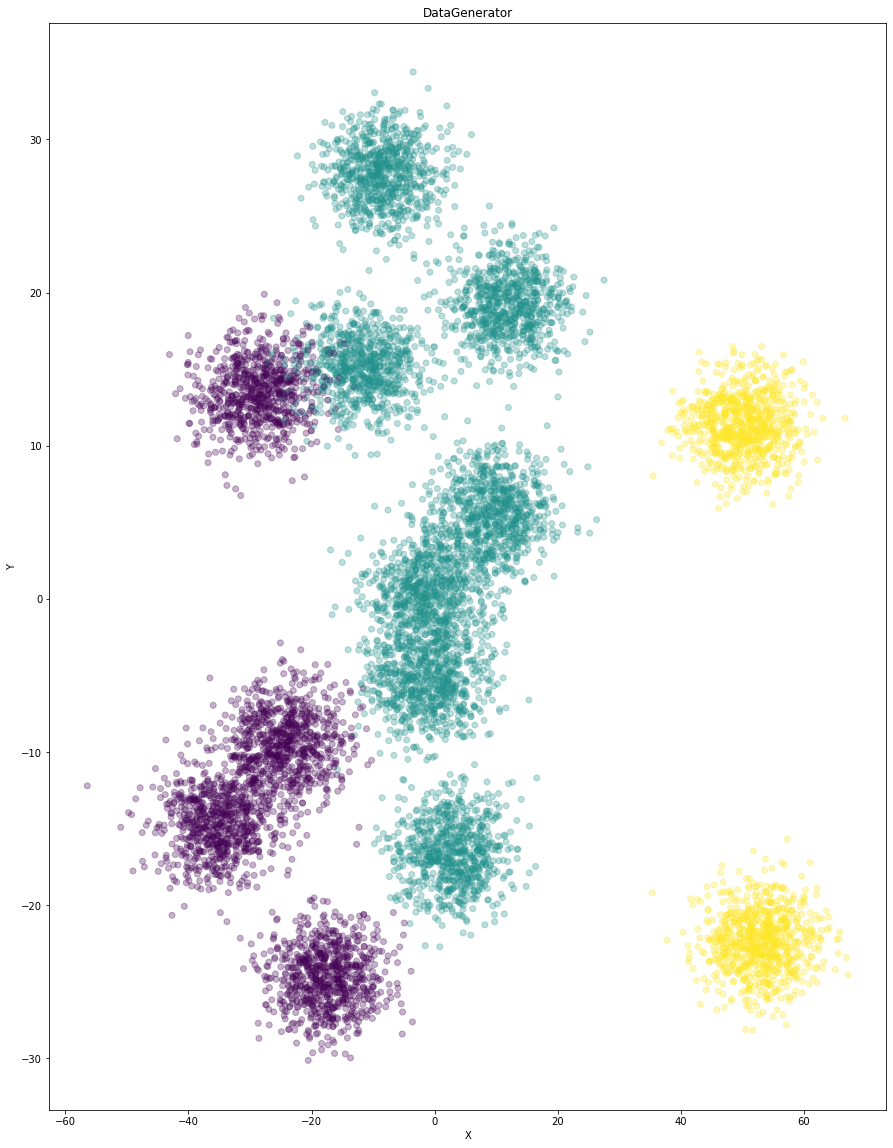

In [36]:
kmeans = KMeans(n_clusters= 3,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.3)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากกราฟจะบอกได้ว่ามี k ทั้งหมด 3 กลุ่ม และมีข้อมูลบางส่วนที่ทับซ้อนก่อน

#**3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

**ใช้วิธี MDS Multidimensional Scaling**

In [37]:
from sklearn.manifold import MDS

In [38]:
mds = MDS(n_components=2)
#กำหนด components ของ mds = 2

In [39]:
new_mds = mds.fit_transform(Data)
#หาระยะห่างระหว่างจุด

**K-means**

In [40]:
kmeans2 = KMeans(n_clusters=3,random_state=2021)
kmeans2.fit(Data)
n = kmeans2.predict(Data)
#กำหนด k = 3
#กำหนดให้ข้อมูลที่จัดกลุ่มเป็น n

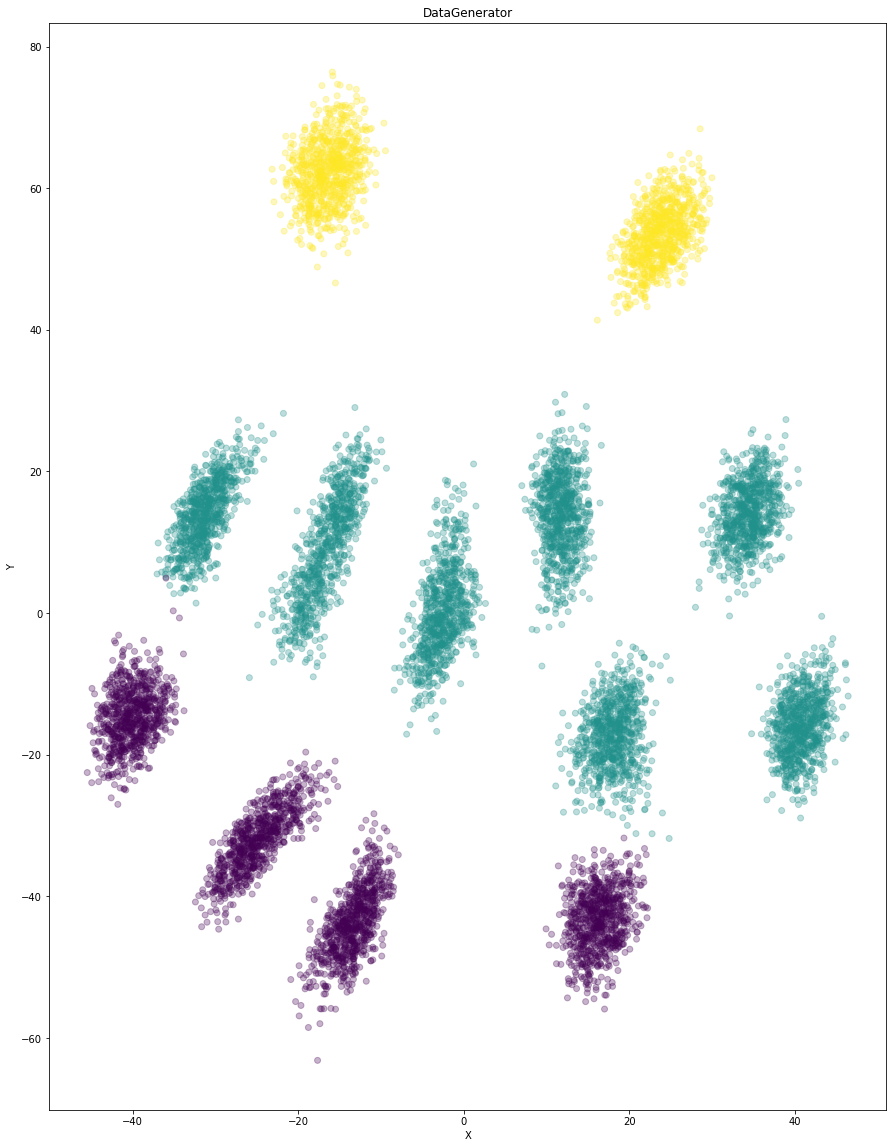

In [41]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=n,alpha=0.3)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

#**4.เปรียบเทียบความแตกต่างของผลข้อ 2 กับ ข้อ 3**

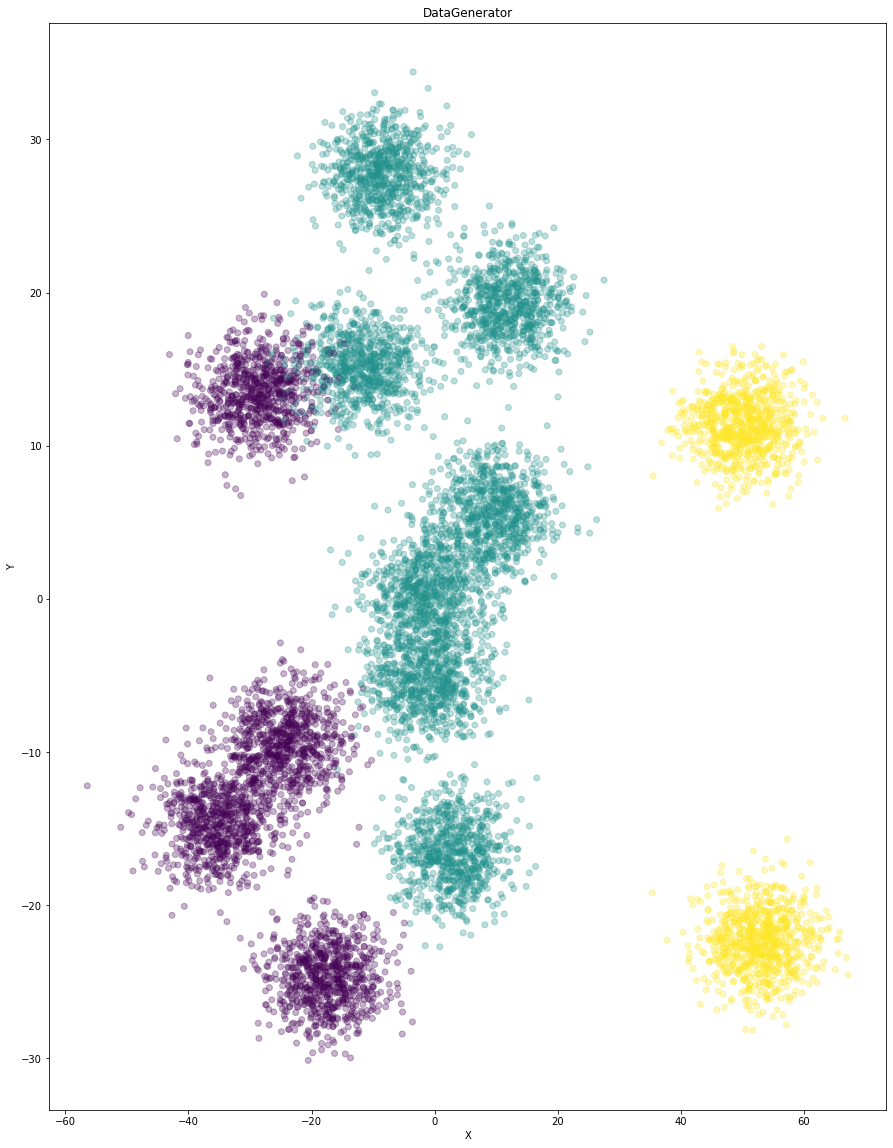

In [42]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.3)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

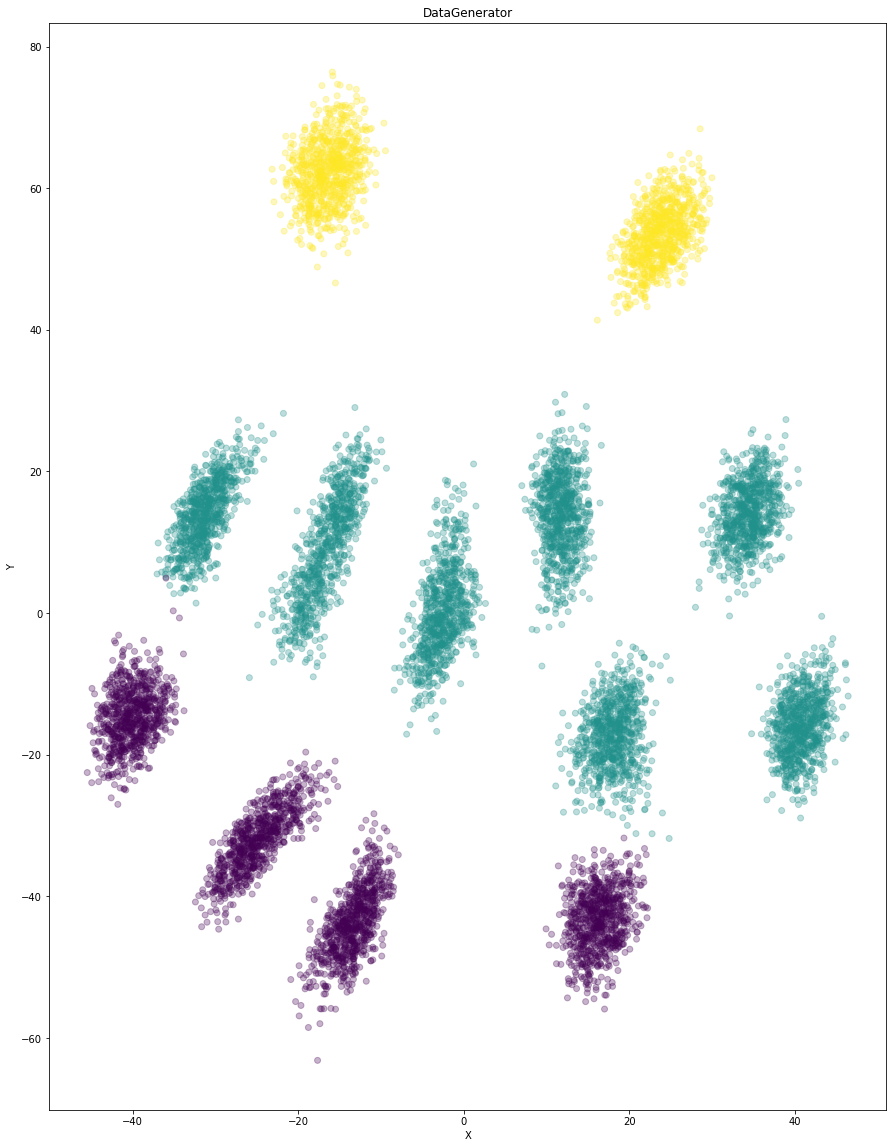

In [43]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=n,alpha=0.3)
plt.title('DataGenerator')
plt.xlabel('X') 
plt.ylabel('Y');

**จากกราฟข้อ 2 และ ข้อ  3** มีการกระจายข้อมูลต่างกัน

**กราฟข้อ 2** จะจัดกลุ่ม clustering ก่อนแล้วทำการลดจำนวน Dimension ของข้อมูล ด้วยการทำ PCA โดยจุดของข้อมูลจะอยู่ที่เดิม

**กราฟข้อ 3** จะลด Dimension ของข้อมูลก่อนแล้วทำการ clustering 
ลด Dimension ด้วยวิธี MDS โดยทุกๆจุดของข้อมูลจะเอาจุดตั้งต้นที่กำหนดเป็นหลัก

**จึงทำให้ผลลัพธ์ออกมาไม่เหมือนกัน**